In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
path = os.path.join(os.getcwd(), "ILDOZFXMON1K")

df = pd.DataFrame()
for file in os.listdir(path):
    if file == "compiled.json":
        continue
    
    aux = pd.read_json(os.path.join(path, file))
    date = file.replace(".json","")
    aux = aux.assign(Data=date)
    df = pd.concat([df, aux])


df.reset_index(inplace=True)
df.to_json(os.path.join(path, "compiled.json"))

In [20]:
df = pd.read_json(os.path.join(path, "compiled.json"))
df["Data"] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df

,index,Título,Preço,Data
0,0,Your name,32.20,2023-01-05
1,1,Toradora! - Livro 10,23.10,2023-01-05
2,2,O tempo com você - Weathering With You (Novel),0.00,2023-01-05
3,3,"Monogatari Series Box Set, Season 2",392.09,2023-01-05
4,4,Toradora! - Livro 09,22.90,2023-01-05
...,...,...,...,...
75,11,Re:Zero - Começando uma Vida em Outro Mundo - ...,18.30,2023-01-10
76,12,Re:Zero – Começando uma Vida em Outro Mundo Li...,20.33,2023-01-10
77,13,Re:Zero - Começando uma Vida em Outro Mundo - ...,22.90,2023-01-10
78,14,Re:Zero - Começando uma Vida em Outro Mundo - ...,22.90,2023-01-10


In [21]:
# Sort by date and get their unique values
dater = df.sort_values('Data', ascending=False).drop_duplicates(['Data'])

# Get the latest date and the second latest date
latest = dater.at[dater.index[0],'Data']
slatest = dater.at[dater.index[1],'Data']
print(latest, slatest, sep="\n")

2023-01-10 00:00:00
2023-01-09 00:00:00


In [22]:
# Get only the rows that are in the latest and in the second latest date
# Retornar apenas os registros que possuem a primeira e segunda data mais recente
df = df[df['Data'].isin([latest, slatest])] 

# If you want the one that are NOT in the first and second latest data:
# df = df[~df['Data'].isin([latest, slatest])] 

df


,index,Título,Preço,Data
48,0,Your name,32.20,2023-01-09
49,1,Toradora! - Livro 10,23.10,2023-01-09
50,2,O tempo com você - Weathering With You (Novel),0.00,2023-01-09
51,3,"Monogatari Series Box Set, Season 2",392.09,2023-01-09
52,4,Toradora! - Livro 09,22.90,2023-01-09
53,5,Re:Zero - Começando uma Vida em Outro Mundo - ...,25.40,2023-01-09
54,6,Re:Zero - Começando uma Vida em Outro Mundo - ...,22.90,2023-01-09
55,7,Re:Zero - Começando uma Vida em Outro Mundo - ...,18.30,2023-01-09
56,8,Re:Zero - Começando uma Vida em Outro Mundo - ...,16.10,2023-01-09
57,9,Re:Zero - Começando uma Vida em Outro Mundo - ...,17.50,2023-01-09


In [23]:
# Get separate dataframes to compare the prices
df1 = df[df['Data'].isin([latest])].sort_values("Título")
df2 = df[df['Data'].isin([slatest])].sort_values("Título")

for i, j in zip(df1.index, df2.index):
    if df1["Preço"][i] < df2["Preço"][j]:
        print(df2["Título"][j], "-", df2["Preço"][j], "->", df1["Preço"][i], sep=" ")
    


Re:Zero – Começando uma Vida em Outro Mundo Livro 14 - 22.9 -> 20.33


In [24]:
dfgroup = df.groupby("Data", group_keys=True)
# dfgroup = df.groupby("Título", group_keys=True).apply(lambda x: x)

dfgroup

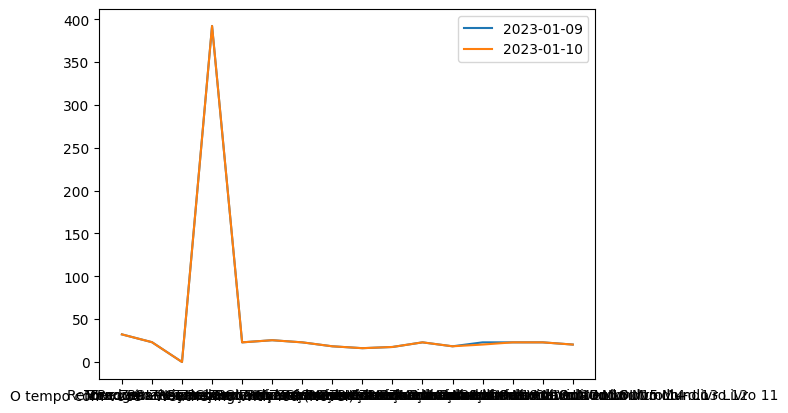

In [25]:
# Iterate through each group in the groupby dataframe
for group, data in dfgroup:
    date = group.strftime('%Y-%m-%d')
    # for i, row in data.iterrows():
    plt.plot(data["Título"], data["Preço"], label=date)
    # print(row["Título"])

plt.legend()
plt.show()